In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Model Training

In [5]:
x = df.drop('target',axis=1)
y = df['target']

# Normalization

In [6]:
normal_scaler = MinMaxScaler()
array1 =normal_scaler.fit_transform(x)
x_new= pd.DataFrame(array1,columns=x.columns)
x_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


### data split

In [7]:
x_train , x_test, y_train, y_test = train_test_split(x_new,y,test_size= 0.2,random_state= 15, stratify=y) 

In [8]:
# Initiating KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
# training data evaluation

y_pred_train = knn_clf.predict(x_train)

In [10]:
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print("accuracy :\n", acc)

clf_report = classification_report(y_train,y_pred_train)
print("clf report :\n",clf_report)


cnf matrix:
 [[ 95  15]
 [ 15 117]]
accuracy :
 0.8760330578512396
clf report :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.89      0.89      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



In [11]:
# testing data evaluation

y_pred_test = knn_clf.predict(x_test)

In [12]:
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_test,y_pred_test)
print("accuracy :\n", acc)

clf_report = classification_report(y_test,y_pred_test)
print("clf report :\n",clf_report)


cnf matrix:
 [[23  5]
 [ 8 25]]
accuracy :
 0.7868852459016393
clf report :
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.83      0.76      0.79        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



## Hyperparameter tuning

In [13]:
knn_model = KNeighborsClassifier()

In [14]:
hyperpara = {'n_neighbors' : np.arange(3,20),
            'p': [1,2]} #to check parameters

In [15]:
# using Gridsearch_cv
gscv_knn_model = GridSearchCV(knn_model,hyperpara,cv=3)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=18, p=1)

In [16]:
new_knn_model = gscv_knn_model.best_estimator_
new_knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18, p=1)

In [17]:
train_acc = new_knn_model.score(x_train,y_train)
print(train_acc)

0.8512396694214877


In [18]:
test_acc = new_knn_model.score(x_test,y_test)
test_acc

0.8032786885245902

### p = 1

In [19]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =1)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [20]:
print(training_acc)
print(testing_acc)

[0.9090909090909091, 0.8966942148760331, 0.8925619834710744, 0.8801652892561983, 0.8636363636363636, 0.8760330578512396, 0.8801652892561983, 0.8636363636363636, 0.859504132231405, 0.859504132231405, 0.859504132231405, 0.8553719008264463, 0.8553719008264463, 0.8553719008264463, 0.859504132231405, 0.8512396694214877, 0.8553719008264463]
[0.8032786885245902, 0.7704918032786885, 0.819672131147541, 0.8032786885245902, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.7540983606557377, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393]


Text(0, 0.5, 'Accuracy')

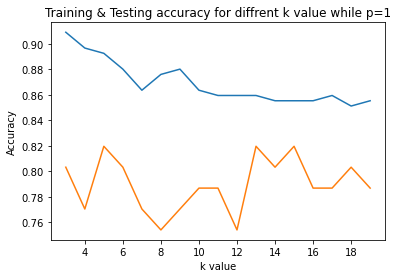

In [21]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=1')
plt.xlabel('k value')
plt.ylabel('Accuracy')

### p = 2

In [22]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =2)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [23]:
print(training_acc)
print(testing_acc)

[0.9049586776859504, 0.871900826446281, 0.8760330578512396, 0.859504132231405, 0.8760330578512396, 0.8842975206611571, 0.8636363636363636, 0.859504132231405, 0.8347107438016529, 0.8429752066115702, 0.8181818181818182, 0.8181818181818182, 0.8099173553719008, 0.8181818181818182, 0.8099173553719008, 0.8140495867768595, 0.8057851239669421]
[0.7868852459016393, 0.7704918032786885, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7377049180327869, 0.7704918032786885, 0.7540983606557377, 0.7377049180327869, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885]


Text(0, 0.5, 'Accuracy')

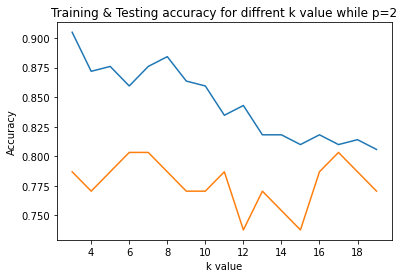

In [24]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=2')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [25]:
knn_new = KNeighborsClassifier(n_neighbors=17,p=2)

In [26]:
knn_new.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [27]:
knn_new.score(x_train,y_train) # KNN new for train

0.8099173553719008

In [28]:
knn_new.score(x_test,y_test) # KNN new for test

0.8032786885245902

# Standardization

In [29]:
standard_scaler = StandardScaler()
array2 = standard_scaler.fit_transform(x)
x_new_std= pd.DataFrame(array2,columns=x.columns)
x_new_std

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


#### Train test split

In [30]:
x_train , x_test, y_train, y_test = train_test_split(x_new_std,y,test_size= 0.2,random_state= 15, stratify=y) 

In [31]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
# training data evaluation

y_pred_train = knn_clf.predict(x_train)

In [33]:
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_train,y_pred_train)
print("accuracy :\n", acc)

clf_report = classification_report(y_train,y_pred_train)
print("clf report :\n",clf_report)


cnf matrix:
 [[ 92  18]
 [ 14 118]]
accuracy :
 0.8677685950413223
clf report :
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.87      0.89      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



In [34]:
# testing data evaluation

y_pred_test = knn_clf.predict(x_test)

In [35]:
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("cnf matrix:\n",cnf_matrix)

acc = accuracy_score(y_test,y_pred_test)
print("accuracy :\n", acc)

clf_report = classification_report(y_test,y_pred_test)
print("clf report :\n",clf_report)


cnf matrix:
 [[21  7]
 [ 5 28]]
accuracy :
 0.8032786885245902
clf report :
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Hyperparameter tuning

In [36]:
knn_model = KNeighborsClassifier()

In [37]:
hyperpara = {'n_neighbors' : np.arange(3,20),
            'p': [1,2]} #to check parameters

In [38]:
# using Gridsearch_cv
gscv_knn_model = GridSearchCV(knn_model,hyperpara,cv=3)
gscv_knn_model.fit(x_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=9, p=1)

In [39]:
new_knn_model = gscv_knn_model.best_estimator_
new_knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [40]:
train_acc = new_knn_model.score(x_train,y_train)
print(train_acc)

0.8760330578512396


In [41]:
test_acc = new_knn_model.score(x_test,y_test)
test_acc

0.8032786885245902

In [42]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =1)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [43]:
print(training_acc)
print(testing_acc)

[0.9049586776859504, 0.8801652892561983, 0.8884297520661157, 0.8966942148760331, 0.8760330578512396, 0.8677685950413223, 0.8760330578512396, 0.8801652892561983, 0.871900826446281, 0.8760330578512396, 0.8553719008264463, 0.8553719008264463, 0.8512396694214877, 0.8429752066115702, 0.8553719008264463, 0.8636363636363636, 0.8512396694214877]
[0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.8032786885245902]


Text(0, 0.5, 'Accuracy')

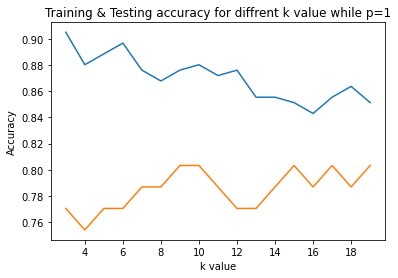

In [44]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=1')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [45]:
training_acc = []
testing_acc = []

for k in range(3,20):
    knn_clf_model = KNeighborsClassifier(n_neighbors=k,p =2)
    knn_clf_model.fit(x_train,y_train)
    
    train_acc = knn_clf_model.score(x_train,y_train)
    training_acc.append(train_acc)
    
    test_acc = knn_clf_model.score(x_test,y_test)
    testing_acc.append(test_acc)

In [46]:
print(training_acc)
print(testing_acc)

[0.8925619834710744, 0.8760330578512396, 0.8677685950413223, 0.8760330578512396, 0.8677685950413223, 0.871900826446281, 0.8636363636363636, 0.871900826446281, 0.8801652892561983, 0.8842975206611571, 0.859504132231405, 0.8677685950413223, 0.8471074380165289, 0.8512396694214877, 0.8388429752066116, 0.8429752066115702, 0.8305785123966942]
[0.8032786885245902, 0.7868852459016393, 0.8032786885245902, 0.7868852459016393, 0.819672131147541, 0.7868852459016393, 0.819672131147541, 0.8032786885245902, 0.819672131147541, 0.819672131147541, 0.819672131147541, 0.8524590163934426, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918, 0.8360655737704918]


Text(0, 0.5, 'Accuracy')

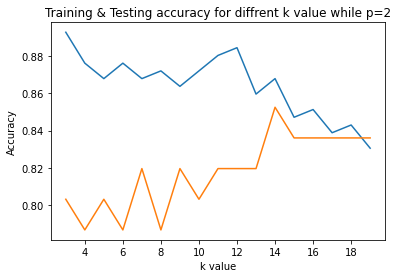

In [47]:
k = np.arange(3,20)
plt.plot(k,training_acc)
plt.plot(k,testing_acc)
plt.title('Training & Testing accuracy for diffrent k value while p=2')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [48]:
knn_new = KNeighborsClassifier(n_neighbors=17,p=2)

In [49]:
knn_new.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [50]:
knn_new.score(x_train,y_train) #train

0.8388429752066116

In [51]:
knn_new.score(x_test,y_test) #test

0.8360655737704918

In [52]:
import pickle 

In [53]:
pickle.dump(knn_new, open('KNN HD model.pkl','wb'))